In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
train = pd.read_csv('mitbih_train.csv', header=None)
test = pd.read_csv('mitbih_test.csv', header=None)

In [4]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train[187]).astype(int)
y_test = to_categorical(test[187]).astype(int)

In [5]:
y_train

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [6]:
X_train = train.iloc[:,:187].values
X_test = test.iloc[:,:187].values

In [7]:
X_train

array([[0.97794116, 0.92647058, 0.68137252, ..., 0.        , 0.        ,
        0.        ],
       [0.96011394, 0.86324787, 0.46153846, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.65945947, 0.18648648, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.90612245, 0.62448978, 0.59591836, ..., 0.        , 0.        ,
        0.        ],
       [0.85822785, 0.64556962, 0.84556961, ..., 0.        , 0.        ,
        0.        ],
       [0.90150636, 0.84588647, 0.80069524, ..., 0.        , 0.        ,
        0.        ]])

In [8]:
X_train.shape

(87554, 187)

In [11]:
X_train = np.reshape(X_train, (87554, 187, 1))

In [12]:
X_train.shape

(87554, 187, 1)

In [13]:
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential

in_nn = Input(shape=(X_train.shape[1],X_train.shape[2]), name='in_nn')

lstm1 = LSTM(units=64, name='lstm1', return_sequences = True)(in_nn)   #(takes in for shape (batch_size, size1, size2))
lstm2 = LSTM(units=64, name='lstm2', return_sequences = True)(lstm1)
dense1 = Dense(units=64, activation='relu', name='dense1')(lstm2)
flatten = Flatten()(dense1)
dense2 = Dense(units=32, activation='relu', name='dense2')(flatten)
dense3 = Dense(units=5, activation='softmax', name='dense3')(dense2)

model = Model(inputs=in_nn, outputs=dense3)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 in_nn (InputLayer)          [(None, 187, 1)]          0         
                                                                 
 lstm1 (LSTM)                (None, 187, 64)           16896     
                                                                 
 lstm2 (LSTM)                (None, 187, 64)           33024     
                                                                 
 dense1 (Dense)              (None, 187, 64)           4160      
                                                                 
 flatten (Flatten)           (None, 11968)             0         
                                                                 
 dense2 (Dense)              (None, 32)                383008    
                                                                 
 dense3 (Dense)              (None, 5)                 165   

In [15]:
history = model.fit(X_train, y_train, epochs=5, batch_size=16)

Epoch 1/5
5473/5473 [==============================] - 106s 17ms/step - loss: 0.2049 - accuracy: 0.9441
Epoch 2/5
5473/5473 [==============================] - 93s 17ms/step - loss: 0.1141 - accuracy: 0.9680
Epoch 3/5
5473/5473 [==============================] - 91s 17ms/step - loss: 0.0874 - accuracy: 0.9757
Epoch 4/5
5473/5473 [==============================] - 89s 16ms/step - loss: 0.0731 - accuracy: 0.9793
Epoch 5/5
5473/5473 [==============================] - 86s 16ms/step - loss: 0.0652 - accuracy: 0.9811


In [16]:
history.history

{'loss': [0.2048969715833664,
  0.11405407637357712,
  0.08739949762821198,
  0.07313375174999237,
  0.0652187317609787],
 'accuracy': [0.9441145062446594,
  0.9680311679840088,
  0.9756835699081421,
  0.9793384671211243,
  0.981120228767395]}

In [17]:
# Evaluate on the test data
results = model.evaluate(X_test, y_test, batch_size=16)

1369/1369 [==============================] - 14s 10ms/step - loss: 0.0991 - accuracy: 0.9755


In [18]:
print("test loss, test acc:", results)

test loss, test acc: [0.09914816915988922, 0.9755162000656128]


In [19]:
y_pred = model.predict(X_test)

In [20]:
y_pred

array([[9.9939620e-01, 5.7641242e-04, 1.8553945e-05, 8.8571096e-06,
        2.2437074e-10],
       [9.7967815e-01, 1.9720206e-02, 1.6928189e-04, 4.2697843e-04,
        5.1972106e-06],
       [9.9976677e-01, 2.3327951e-04, 3.2872055e-08, 2.6564086e-09,
        1.7584890e-14],
       ...,
       [9.4987685e-03, 3.2600816e-05, 3.0446332e-05, 7.7240230e-07,
        9.9043745e-01],
       [1.5196751e-05, 1.4249975e-11, 2.9462208e-10, 3.6033565e-12,
        9.9998486e-01],
       [3.8444218e-06, 5.2869330e-13, 1.1742184e-07, 6.3042482e-09,
        9.9999607e-01]], dtype=float32)

Normalized confusion matrix


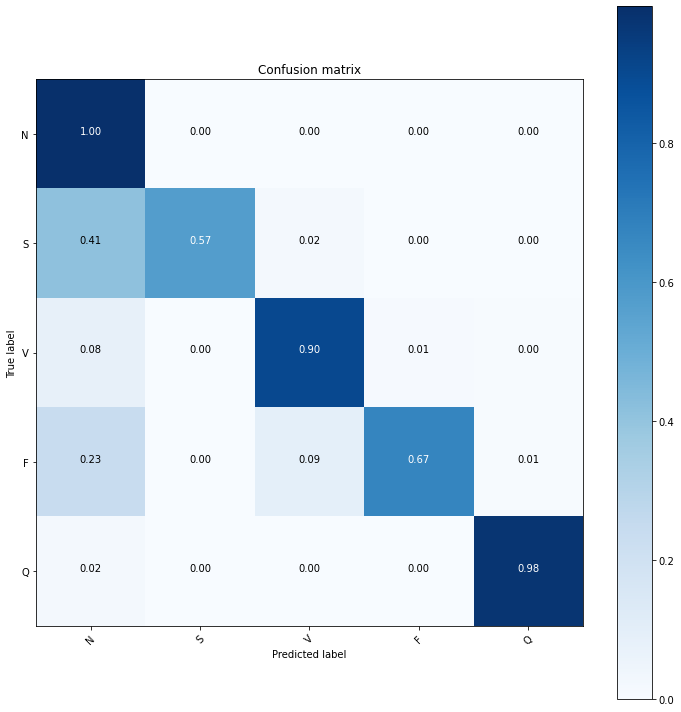

In [21]:
# The following function plots the confusion matrix. Can toggle normalization.

from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix

cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix

plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix')
plt.show()